<a href="https://colab.research.google.com/github/shineloveyc/DL_with_Keras/blob/master/Keras_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IMDB data set : a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

*Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

In [1]:
from keras.datasets import imdb

# load top 10000 most frequently occuring words, words being encoded to a dictionary based on frequency
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [2]:
#each word has been encoding to a integer, and each sample is a list of review(include list of integer)
train_data[0]
type(train_data)
# output sample size
print(train_data.shape)
print(train_data.ndim)

(25000,)
1


In [3]:
# training label is 1 or 0 to indicate positive and negative
train_labels[0]

1

In [4]:
#decoding the word
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(reverse_word_index[999])


1646592/1641221 [==============================] - 0s 0us/step
cop


In [5]:
print(reverse_word_index[999])

cop


In [0]:
#prepare the data==> turning the list of words to tensor
# Encoding the integer sequence into a binary matrix(one- hot encoding)
import numpy as np
def vector_seq (seq, dim = 10000):
  results = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
      results[i, seq] = 1.
  return results

In [0]:
# vectorize train and test features
x_train = vector_seq(train_data)
x_test = vector_seq(test_data)

In [8]:
# sample out put after encoding
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# vectorize labels
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_labels).astype('float32')

In [10]:
# build the network
from keras import models
from keras import layers

# build sequential model
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# compile the model
model.compile(optimizer='rmsprop', 
             loss ='binary_crossentropy',
             metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#config the optimizer by customize the optimizer
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [0]:
# create validate set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 402us/step - loss: 0.5291 - binary_accuracy: 0.7830 - val_loss: 0.4063 - val_binary_accuracy: 0.8700
Epoch 2/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.3218 - binary_accuracy: 0.9013 - val_loss: 0.3177 - val_binary_accuracy: 0.8838
Epoch 3/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2370 - binary_accuracy: 0.9250 - val_loss: 0.2810 - val_binary_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1847 - binary_accuracy: 0.9417 - val_loss: 0.3194 - val_binary_accuracy: 0.8706
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1526 - binary_accuracy: 0.9519 - val_loss: 0.2871 - val_binary_accuracy: 0.8859
Epoch 6/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1258 - binary_accuracy: 0.9621 - val_loss: 0.2943 - val_binary

In [15]:
# model has an model object which is a dictionary contains everyting happend during training
history_obj = history.history
history_obj.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

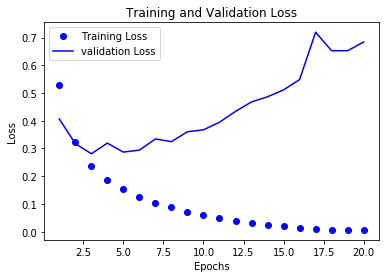

In [16]:
# plot traing and vaildation loss for 20 epochs
import matplotlib.pyplot as plt

loss_values = history_obj['loss']
val_loss_values = history_obj['val_loss']
acc = history_obj['binary_accuracy']
epochs = range(1, len(acc)+1)

# bo is for blue dot, and b is for sold blue line
plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = "validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

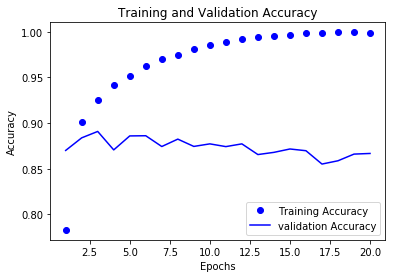

In [17]:
#plot training and validation accuracy

acc_values = history_obj['binary_accuracy']
val_acc_values = history_obj['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = "validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
#since start from the 3/4 epochs, the model starts overfitting, as training acc keep increase but val decrease, which means the model can't general to new instance
#rebuild the model to make sure it stop optimization as 3 epochs
model.fit(x_train, 
                    y_train,
                    epochs = 3,
                    batch_size = 512)

Epoch 1/3
25000/25000 [==============================] - 1s 51us/step - loss: 0.2103 - binary_accuracy: 0.9467
Epoch 2/3
25000/25000 [==============================] - 1s 51us/step - loss: 0.1353 - binary_accuracy: 0.9604
Epoch 3/3
25000/25000 [==============================] - 1s 52us/step - loss: 0.1103 - binary_accuracy: 0.9666


In [19]:
#model evaluation
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 82us/step


[0.46336725335121154, 0.86192]